### 데이터 불러오기

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_sample_weight
%matplotlib inline

In [481]:
data=pd.read_csv('_satisfaction.csv',index_col='id')

### matplotlib을 활용하기 위한 설정

In [482]:
plt.style.use('classic') ###CLASSIC style의 그림을 그려준다

In [483]:
import matplotlib.font_manager as fm
print ('설정 파일 위치: ', mpl.matplotlib_fname())###matplotlib 설정 위치


설정 파일 위치:  C:\Users\jang\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [484]:
plt.rc('font', family='NanumGothic')###한글 글꼴 사용 나눔고딕글꼴이 있어야 합니다



#### 데이터의 크기가 너무 크므로 10%만 사용하기로 한다. 120k-> 12k (컴퓨팅 파워문제)

In [485]:
data=data.sample(12000,random_state=1016)

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 55304 to 86560
Data columns (total 23 columns):
satisfaction_v2                      12000 non-null int64
Gender                               12000 non-null int64
Customer Type                        12000 non-null int64
Age                                  12000 non-null int64
Type of Travel                       12000 non-null int64
Class                                12000 non-null int64
Flight Distance                      12000 non-null int64
Seat comfort                         12000 non-null int64
Departure/Arrival time convenient    12000 non-null int64
Food and drink                       12000 non-null int64
Gate location                        12000 non-null int64
Inflight wifi service                12000 non-null int64
Inflight entertainment               12000 non-null int64
Online support                       12000 non-null int64
Ease of Online booking               12000 non-null int64
On-board service 

In [487]:
data.describe()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,11958.000000
mean,0.543750,0.510333,0.810417,39.205500,0.688333,0.592833,1989.940833,2.861333,3.012083,2.863500,...,3.511500,3.461000,3.470750,3.471917,3.696833,3.357083,3.706750,3.354833,14.845583,15.078943
std,0.498103,0.499914,0.391988,15.197846,0.463194,0.621756,1025.567978,1.388500,1.524565,1.443101,...,1.308757,1.306887,1.261458,1.297633,1.163774,1.267626,1.156734,1.304186,40.105745,40.136804
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1380.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,1936.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,1.000000,2536.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,2.000000,6837.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [488]:
data.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
55304,1,0,0,23,1,1,2695,5,4,4,...,5,4,4,5,3,5,4,4,37,39.0
98174,1,1,1,41,1,0,340,1,1,1,...,5,5,5,5,5,5,5,3,0,0.0
114636,1,0,1,45,1,0,2702,1,1,1,...,4,5,5,5,5,3,5,4,0,0.0
102451,1,1,1,11,0,1,1205,4,5,4,...,1,1,4,5,4,4,4,1,0,0.0
48872,1,0,1,55,1,0,83,1,1,1,...,3,3,3,4,3,3,3,2,49,59.0


In [489]:
data.tail()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
67706,1,0,1,45,1,0,1891,5,5,5,...,5,4,4,4,4,4,4,4,0,0.0
97493,0,1,1,9,0,1,1809,4,5,4,...,1,1,5,3,5,5,5,1,4,9.0
50072,0,1,1,38,1,0,3703,1,5,4,...,3,2,2,2,1,3,2,3,0,0.0
129204,0,1,1,39,1,1,3934,2,2,2,...,2,2,2,4,2,2,3,2,4,0.0
86560,0,0,1,33,1,2,2220,4,5,5,...,4,4,4,4,4,2,4,4,57,44.0


In [490]:
print('Missing values: %i' % data.isnull().sum().sum()) 

Missing values: 42


### missing value를 가진 관측치가 있다

In [491]:
data[data.isnull().sum(1)==1]['satisfaction_v2'].value_counts() ## missing value가 있는 관측치들의 반응변수 비율

0    22
1    20
Name: satisfaction_v2, dtype: int64

In [492]:
data['satisfaction_v2'].value_counts()

1    6525
0    5475
Name: satisfaction_v2, dtype: int64

In [493]:
data.isnull().sum()

satisfaction_v2                       0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             42
dtype: int64

#### 결측값이 Arrival Delay in Minutes 에만 있는걸 확인했다. 근데 Arrival Delay in Minutes=Departure Delay in Minutes 인 관계를 확인가능

In [494]:
data.describe().loc[:,['Departure Delay in Minutes','Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
count,12000.000000,11958.000000
mean,14.845583,15.078943
std,40.105745,40.136804
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,13.000000,13.000000
max,1592.000000,1584.000000


In [495]:
corr_delay=data.corr().stack()['Departure Delay in Minutes']['Arrival Delay in Minutes']

Text(0.5, 1.0, 'Delay 변수간 상관계수 0.97')

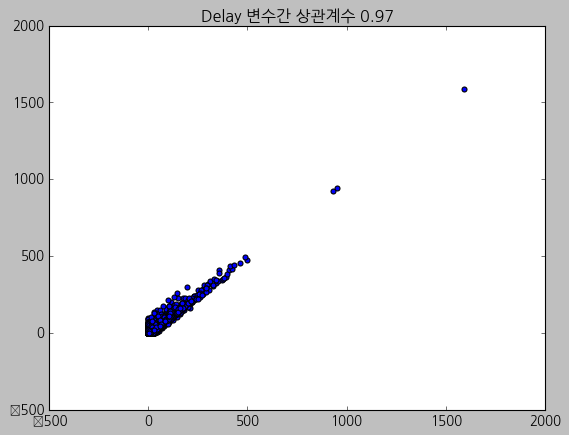

In [496]:
plt.scatter(data['Departure Delay in Minutes'],data['Arrival Delay in Minutes'])
plt.title('Delay 변수간 상관계수 %s'%np.round(corr_delay,2) )

In [497]:
missing_value_index=data[data.isnull().apply(sum,1)!=0].index

In [498]:
data.loc[missing_value_index,'Arrival Delay in Minutes']=list(data.loc[missing_value_index]['Departure Delay in Minutes'])

In [499]:
data.loc[missing_value_index,'Arrival Delay in Minutes']

id
40000       0.0
45562      28.0
13777       4.0
60033      40.0
119008      2.0
72940      41.0
100925     30.0
8522        0.0
104169    181.0
43806      15.0
21763     174.0
64934      19.0
7722        0.0
48612      15.0
71751      19.0
70534       0.0
71265     217.0
21780      26.0
121173      3.0
67589      81.0
8523        0.0
112231      4.0
103297     46.0
36729     230.0
114031      1.0
17846       0.0
19506      60.0
27120       0.0
34036      55.0
39149       1.0
41378       0.0
6694        0.0
67984       0.0
98862       0.0
27638      14.0
71867     153.0
96604       2.0
78260       0.0
3449        0.0
2408       58.0
17767     110.0
74770       0.0
Name: Arrival Delay in Minutes, dtype: float64

In [500]:
print('Missing values: %i' % data.isnull().sum().sum()) ###missing value가 남지 않았다

Missing values: 0


### Class 변수는 범주형 변수이므로 dummy variable로 만들어준다

In [501]:
data['Class'].unique() ### 딱히 특이값이 포함되어 있지 않다

array([1, 0, 2], dtype=int64)

In [502]:
data['Class']=data['Class'].astype('category')

In [503]:
Dummies=True
if Dummies:
    Dummy_Class=pd.get_dummies(data['Class'],prefix="Class").iloc[:,1:3]
    Dummy_Class.columns=['Class_Eco','Class_Eco_plus']###default값은 business
    data=pd.concat([data,Dummy_Class],1)
    data=data.drop('Class',1)



### 각 변수별 평균  & 표준편차 & 분위수를 시각적으로 확인해보자 (범주형 변수와 'Flight Distance' 제외)

In [504]:
continuous_data=data.drop(['Class_Eco','Class_Eco_plus','Flight Distance'],1)
stats=continuous_data.describe()

In [505]:
stats = continuous_data.describe()
print(stats) ###변수들 분포 확인

       satisfaction_v2        Gender  Customer Type           Age  \
count     12000.000000  12000.000000   12000.000000  12000.000000   
mean          0.543750      0.510333       0.810417     39.205500   
std           0.498103      0.499914       0.391988     15.197846   
min           0.000000      0.000000       0.000000      7.000000   
25%           0.000000      0.000000       1.000000     27.000000   
50%           1.000000      1.000000       1.000000     39.000000   
75%           1.000000      1.000000       1.000000     51.000000   
max           1.000000      1.000000       1.000000     85.000000   

       Type of Travel  Seat comfort  Departure/Arrival time convenient  \
count    12000.000000  12000.000000                       12000.000000   
mean         0.688333      2.861333                           3.012083   
std          0.463194      1.388500                           1.524565   
min          0.000000      0.000000                           0.000000   
25%     

Text(0.5, 1.0, '변수별 평균그래프')

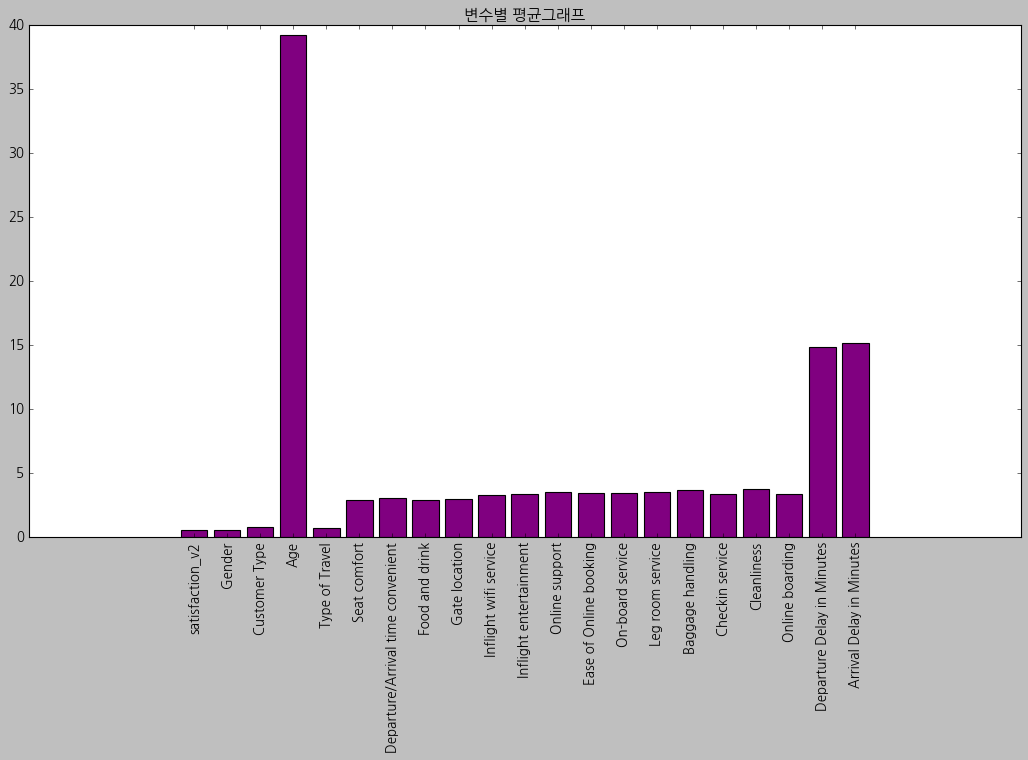

In [506]:
###평균그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_data.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['mean'],color="purple" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 평균그래프', size=14)

Text(0.5, 1.0, '변수별 표준편차 그래프')

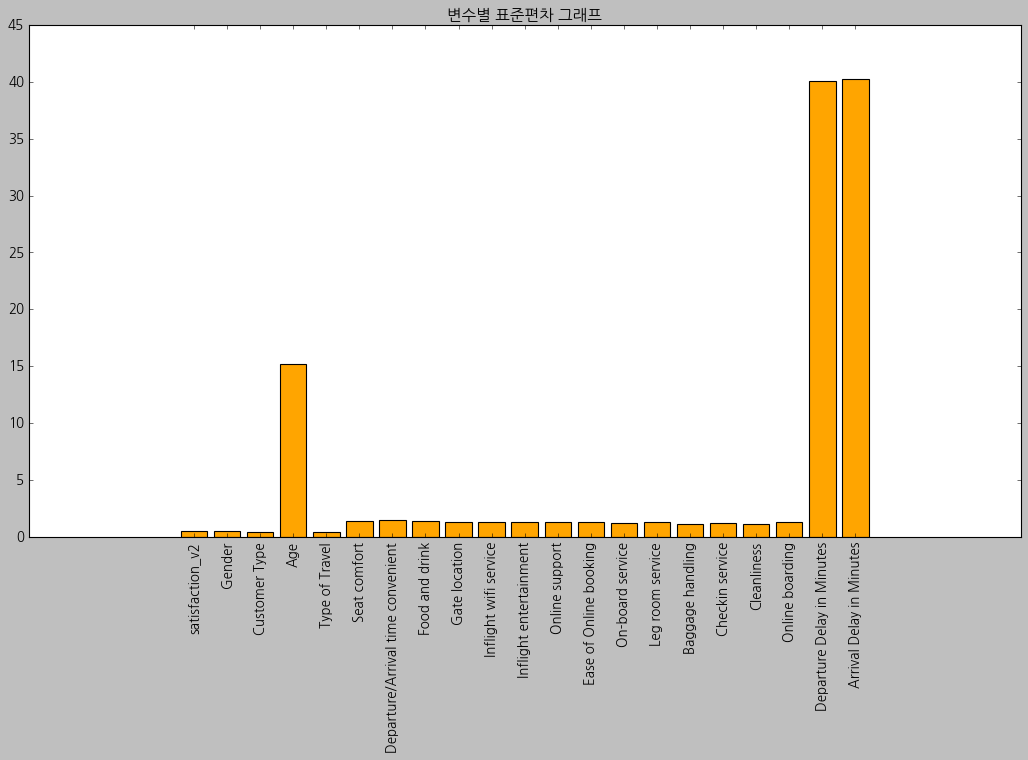

In [507]:
###표준편차 그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_data.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['std'],color="orange" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 표준편차 그래프', size=14)

Text(0.5, 1.0, '분위수')

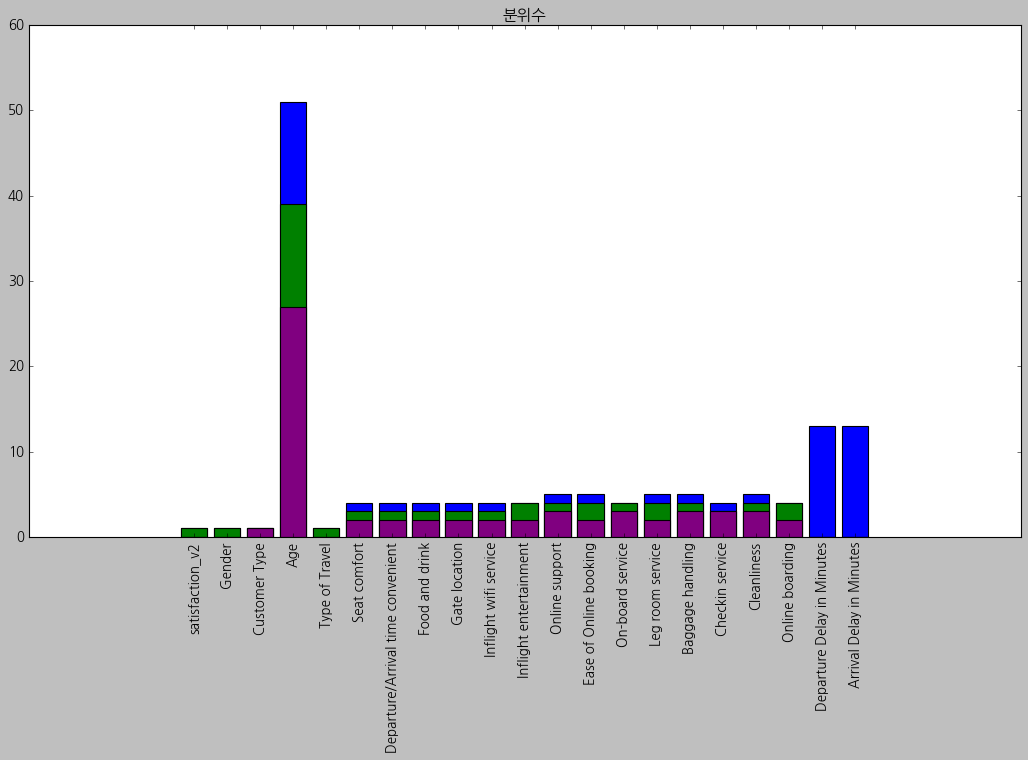

In [508]:
# 분위수 그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_data.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['75%'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats.loc['50%'],color="green" ,alpha=1)
ax1 = plt.bar(x_pos, stats.loc['25%'],color="purple" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('분위수', size=14)

### 관측치가 0인것의 개수 확인

In [509]:
num_zeros = []
for i in range(0, len(data.columns)):
    num_nonzero = len(data.iloc[:,i].nonzero()[0])
    num_zeros.append(data.shape[0] - num_nonzero)

C:\Users\jang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [510]:
num_zeros=pd.Series(num_zeros)
num_zeros.index=data.columns ##개수에 이름을 붙여준다
print(num_zeros)

satisfaction_v2                       5475
Gender                                5876
Customer Type                         2275
Age                                      0
Type of Travel                        3740
Flight Distance                          0
Seat comfort                           401
Departure/Arrival time convenient      603
Food and drink                         529
Gate location                            0
Inflight wifi service                   12
Inflight entertainment                 277
Online support                           0
Ease of Online booking                   0
On-board service                         0
Leg room service                        42
Baggage handling                         0
Checkin service                          0
Cleanliness                              0
Online boarding                          0
Departure Delay in Minutes            6729
Arrival Delay in Minutes              6733
Class_Eco                             6628
Class_Eco_p

Text(0.5, 1.0, '변수별 0의 개수')

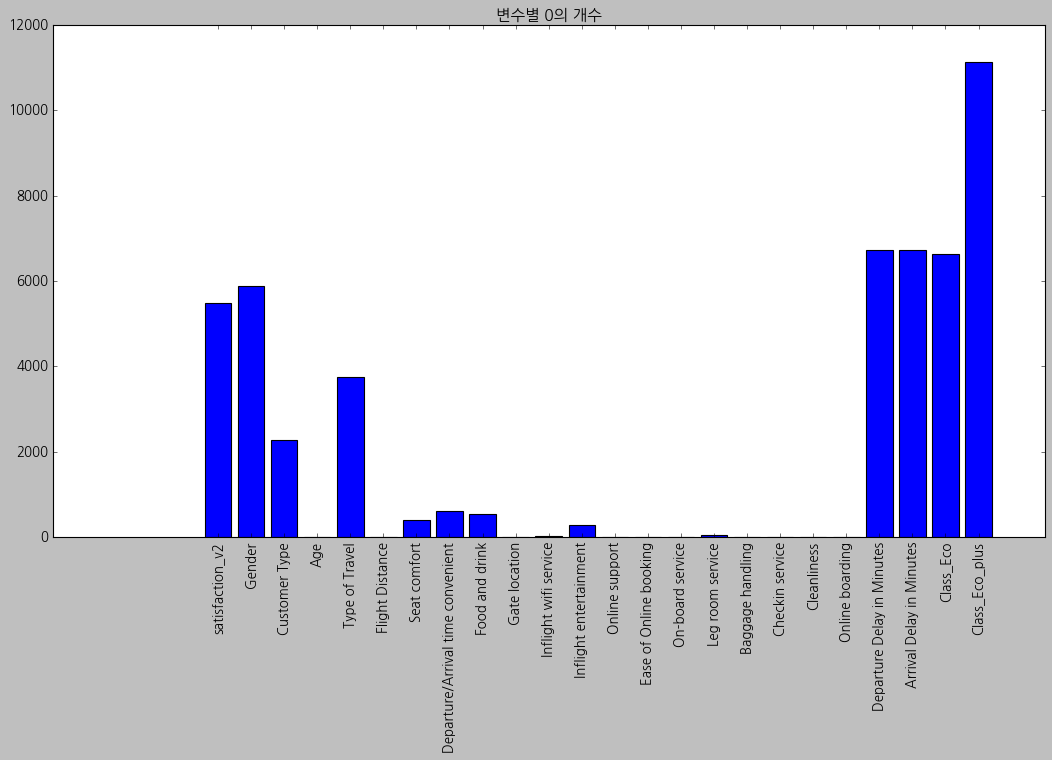

In [511]:
# Plot number of zero values for each feature in order.
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = data.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, num_zeros)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 0의 개수', size=14)

### 이상치 탐지

##### 범주값들은 예상외의 값이 있는지 없는지 확인하고 연속형 변수들은 BOXPLOT

In [512]:
data.describe().T['max']##age,flight distance, departure delay in minutes,arrival delay in minutes

satisfaction_v2                         1.0
Gender                                  1.0
Customer Type                           1.0
Age                                    85.0
Type of Travel                          1.0
Flight Distance                      6837.0
Seat comfort                            5.0
Departure/Arrival time convenient       5.0
Food and drink                          5.0
Gate location                           5.0
Inflight wifi service                   5.0
Inflight entertainment                  5.0
Online support                          5.0
Ease of Online booking                  5.0
On-board service                        5.0
Leg room service                        5.0
Baggage handling                        5.0
Checkin service                         5.0
Cleanliness                             5.0
Online boarding                         5.0
Departure Delay in Minutes           1592.0
Arrival Delay in Minutes             1584.0
Class_Eco                       

In [513]:
continuous_columns=data[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].columns

In [514]:
scaler=preprocessing.StandardScaler()
scaler.fit(data[continuous_columns])
standard_data=pd.DataFrame(scaler.transform(data[continuous_columns]),
                           columns=continuous_columns,index=data.index)
standard_data.describe()

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04
mean,-4.651834e-17,6.550316e-18,6.162108e-16,-1.046478e-16
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-2.119172e+00,-1.891656e+00,-3.701764e-01,-3.766341e-01
25%,-8.031407e-01,-5.947595e-01,-3.701764e-01,-3.766341e-01
50%,-1.352222e-02,-5.259825e-02,-3.701764e-01,-3.766341e-01
75%,7.760963e-01,5.324678e-01,-4.601985e-02,-5.370374e-02
max,3.013349e+00,4.726416e+00,3.932654e+01,3.897119e+01


([<matplotlib.axis.XTick at 0x233cd94ae10>,
 <a list of 4 Text xticklabel objects>)

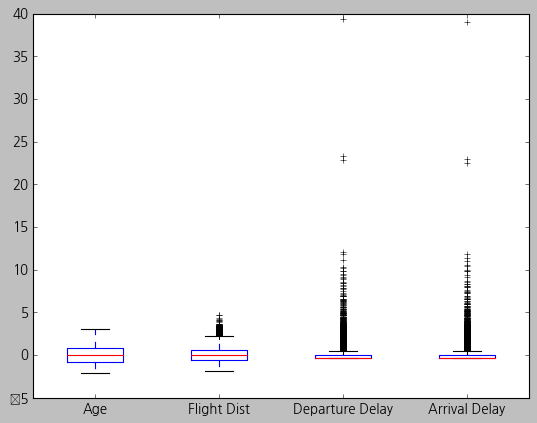

In [515]:
plt.boxplot((standard_data['Age'],standard_data['Flight Distance'],standard_data['Departure Delay in Minutes'],standard_data['Arrival Delay in Minutes']))
plt.xticks([1,2,3,4],['Age','Flight Dist','Departure Delay','Arrival Delay'])

In [516]:
deletes=list(standard_data['Departure Delay in Minutes'][standard_data['Departure Delay in Minutes']>20].index)

In [517]:
data['Departure Delay in Minutes'][deletes] ####15시간 이상 지체된 비행기들 확인

id
63689     951
8345      933
73471    1592
Name: Departure Delay in Minutes, dtype: int64

In [518]:
data=data.drop(deletes)

#### 관측치를 살펴본결과 비행기 이륙시간이 15시간 이상 지체되는 경우는 특수한 경우이고 많은 관측치가 이경우에 해당하는것도 아님으로 이상치라 판별해서 제거 해주었다.

### discrete case

In [519]:
 discrete_columns=data.drop(continuous_columns,1).columns

([<matplotlib.axis.XTick at 0x233cdc485c0>,
 <a list of 20 Text xticklabel objects>)

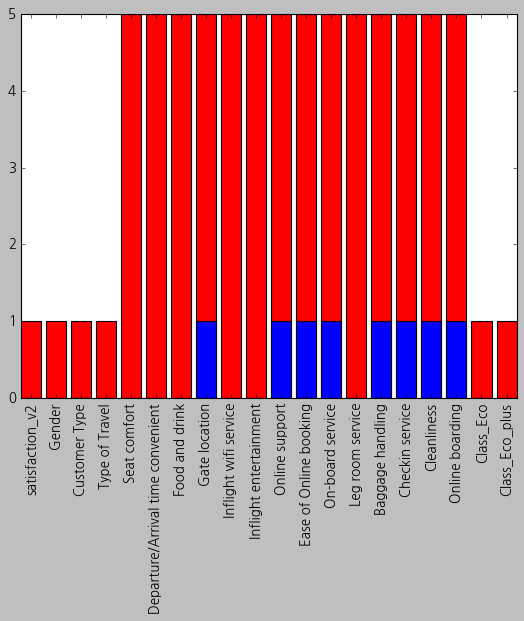

In [520]:
plt.bar(discrete_columns,data[discrete_columns].max(),color='red')
plt.bar(discrete_columns,data[discrete_columns].min(),color='blue')
plt.xticks(discrete_columns,rotation='vertical')

#### 괜히 소수점이나 이상한값 없는지 확인

In [521]:
unique_Dict={}
for i in discrete_columns:
    unique_Dict[i]=list(np.sort(data[i].unique()))
unique_Dict

{'satisfaction_v2': [0, 1],
 'Gender': [0, 1],
 'Customer Type': [0, 1],
 'Type of Travel': [0, 1],
 'Seat comfort': [0, 1, 2, 3, 4, 5],
 'Departure/Arrival time convenient': [0, 1, 2, 3, 4, 5],
 'Food and drink': [0, 1, 2, 3, 4, 5],
 'Gate location': [1, 2, 3, 4, 5],
 'Inflight wifi service': [0, 1, 2, 3, 4, 5],
 'Inflight entertainment': [0, 1, 2, 3, 4, 5],
 'Online support': [1, 2, 3, 4, 5],
 'Ease of Online booking': [1, 2, 3, 4, 5],
 'On-board service': [1, 2, 3, 4, 5],
 'Leg room service': [0, 1, 2, 3, 4, 5],
 'Baggage handling': [1, 2, 3, 4, 5],
 'Checkin service': [1, 2, 3, 4, 5],
 'Cleanliness': [1, 2, 3, 4, 5],
 'Online boarding': [1, 2, 3, 4, 5],
 'Class_Eco': [0, 1],
 'Class_Eco_plus': [0, 1]}

### 반응변수 분포 파악

Text(0.5, 1.0, '반응변수 비율 만족:6524 불만족: 5473')

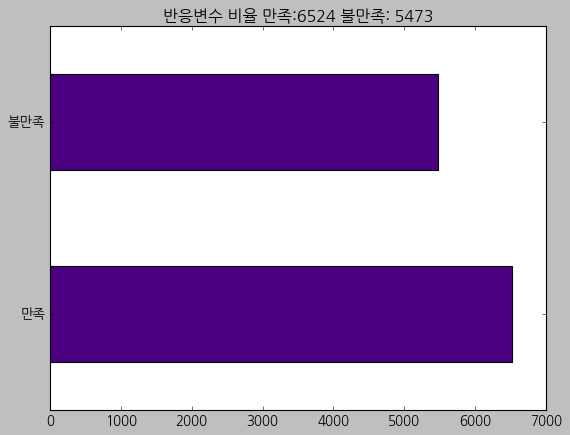

In [522]:
data['satisfaction_v2'].value_counts().plot(kind='barh',color='indigo')
plt.yticks([0,1],["만족","불만족"])
counts=(data['satisfaction_v2'].value_counts().values[0],data['satisfaction_v2'].value_counts().values[1])
plt.title("반응변수 비율 만족:%d 불만족: %d"%counts)


### 주요변수 후보 파악

In [523]:
corr_sat=abs(data.corr()).stack()['satisfaction_v2'].sort_values()[::-1]
print(corr_sat)

satisfaction_v2                      1.000000
Inflight entertainment               0.531620
Ease of Online booking               0.430382
Online support                       0.394540
On-board service                     0.343112
Online boarding                      0.341930
Leg room service                     0.303594
Customer Type                        0.294204
Seat comfort                         0.266109
Class_Eco                            0.265459
Checkin service                      0.253339
Baggage handling                     0.251268
Cleanliness                          0.243887
Inflight wifi service                0.227387
Gender                               0.217215
Food and drink                       0.139887
Age                                  0.116492
Type of Travel                       0.107411
Arrival Delay in Minutes             0.080946
Departure Delay in Minutes           0.073835
Class_Eco_plus                       0.061691
Flight Distance                   

In [524]:
high_correlation=corr_sat.index[1:11]

In [525]:
data_0=data[data['satisfaction_v2']==0]
data_1=data[data['satisfaction_v2']==1] 

### Inflight entertainment 변수 분석

Text(0.5, 1.0, 'Inflight entertainment 히스토그램')

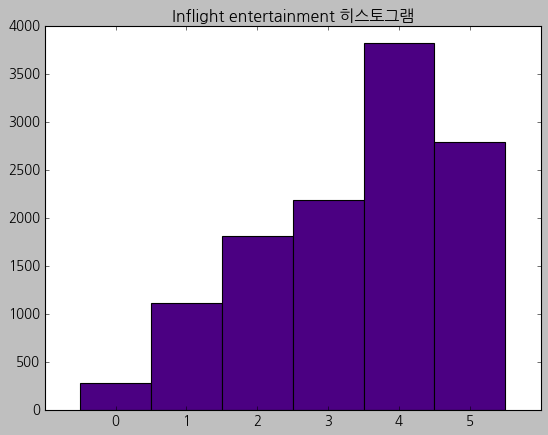

In [526]:
plt.figure()
bins=np.arange(-0.5,6.5,1)
plt.hist(data[high_correlation[0]],bins,align='mid',color='indigo',rwidth=1.0)
plt.xticks(data[high_correlation[0]].unique())
plt.title("%s 히스토그램"%high_correlation[0])

Text(0.5, 1.0, '만족일때 Inflight entertainment 의histogram')

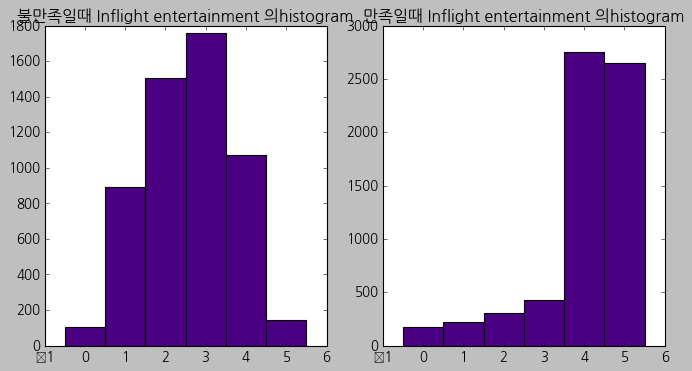

In [527]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(data_0[high_correlation[0]],bins,color='indigo')
axes1.set_title("불만족일때 %s 의histogram"%high_correlation[0])
axes2=plt.subplot(1,2,2)
axes2.hist(data_1[high_correlation[0]],bins,color='indigo')
axes2.set_title("만족일때 %s 의histogram"%high_correlation[0])

In [528]:
table=pd.concat([data_0[high_correlation[0]].value_counts(),data_1[high_correlation[0]].value_counts()],1)
table.columns=[0,1]
table=table.fillna(1)
for i in range(table.shape[0]):
    print("%s의 값이"%high_correlation[0],table.index[i],"이",table.sum(1).iloc[i],"개 있고 오즈는",table.iloc[i,1]/table.iloc[i,0],"이다")

Inflight entertainment의 값이 0 이 277 개 있고 오즈는 1.6634615384615385 이다
Inflight entertainment의 값이 1 이 1111 개 있고 오즈는 0.24831460674157305 이다
Inflight entertainment의 값이 2 이 1813 개 있고 오즈는 0.20545212765957446 이다
Inflight entertainment의 값이 3 이 2182 개 있고 오즈는 0.24188958451906659 이다
Inflight entertainment의 값이 4 이 3823 개 있고 오즈는 2.5629077353215286 이다
Inflight entertainment의 값이 5 이 2791 개 있고 오즈는 18.248275862068965 이다


### Ease of Online booking 변수 분석

Text(0.5, 1.0, 'Ease of Online booking 히스토그램')

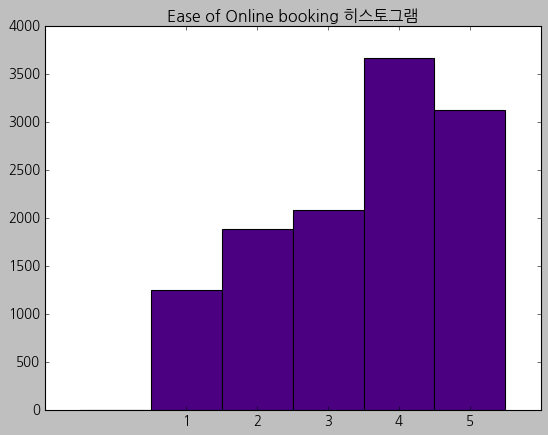

In [529]:
plt.figure()
plt.hist(data[high_correlation[1]],bins,align='mid',color='indigo')
plt.xticks(data[high_correlation[1]].unique())
plt.title("%s 히스토그램"%high_correlation[1])

Text(0.5, 1.0, '만족일때 Ease of Online booking 의histogram')

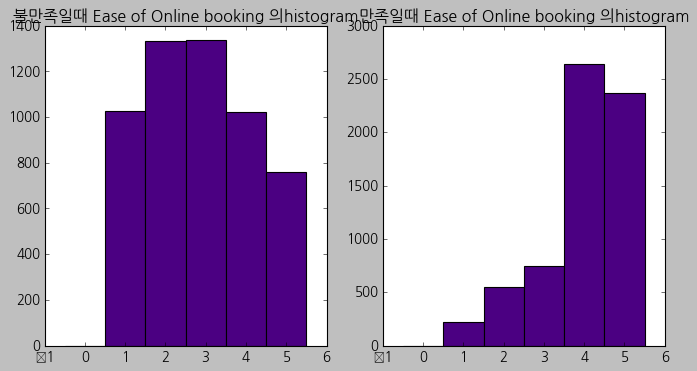

In [530]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(data_0[high_correlation[1]],bins,color='indigo')
axes1.set_title("불만족일때 %s 의histogram"%high_correlation[1])
axes2=plt.subplot(1,2,2)
axes2.hist(data_1[high_correlation[1]],bins,color='indigo')
axes2.set_title("만족일때 %s 의histogram"%high_correlation[1])

In [531]:
table=pd.concat([data_0[high_correlation[1]].value_counts(),data_1[high_correlation[1]].value_counts()],1)
table.columns=[0,1]
table=table.fillna(1)
for i in range(table.shape[0]):
    print("%s의 값이"%high_correlation[1],table.index[i],"이",table.sum(1).iloc[i],"개 있고 오즈는",table.iloc[i,1]/table.iloc[i,0],"이다")

Ease of Online booking의 값이 1 이 1248 개 있고 오즈는 0.21875 이다
Ease of Online booking의 값이 2 이 1884 개 있고 오즈는 0.4154770848985725 이다
Ease of Online booking의 값이 3 이 2078 개 있고 오즈는 0.5553892215568862 이다
Ease of Online booking의 값이 4 이 3662 개 있고 오즈는 2.583170254403131 이다
Ease of Online booking의 값이 5 이 3125 개 있고 오즈는 3.111842105263158 이다


### Online support 변수

Text(0.5, 1.0, 'Online support 히스토그램')

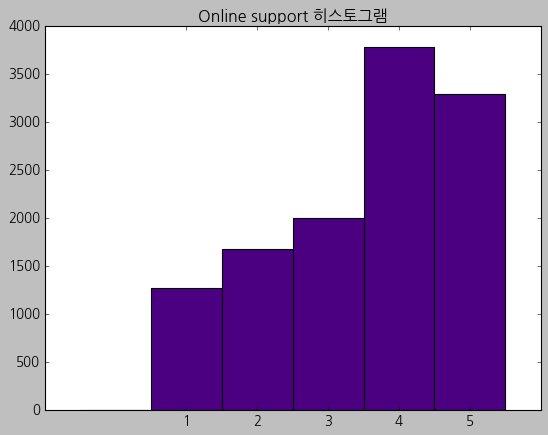

In [532]:
plt.figure()
plt.hist(data[high_correlation[2]],bins,align='mid',color='indigo')
plt.xticks(data[high_correlation[2]].unique())
plt.title("%s 히스토그램"%high_correlation[2])

Text(0.5, 1.0, '만족일때 Online support 의histogram')

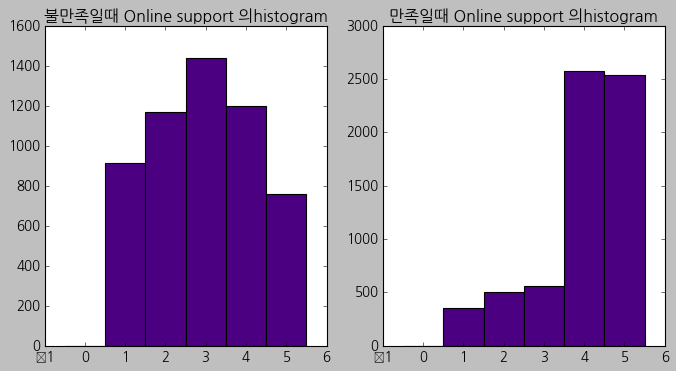

In [533]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(data_0[high_correlation[2]],bins,color='indigo')
axes1.set_title("불만족일때 %s 의histogram"%high_correlation[2])
axes2=plt.subplot(1,2,2)
axes2.hist(data_1[high_correlation[2]],bins,color='indigo')
axes2.set_title("만족일때 %s 의histogram"%high_correlation[2])

In [534]:
table=pd.concat([data_0[high_correlation[2]].value_counts(),data_1[high_correlation[2]].value_counts()],1)
table.columns=[0,1]
table=table.fillna(1)
for i in range(table.shape[0]):
    print("%s의 값이"%high_correlation[2],table.index[i],"이",table.sum(1).iloc[i],"개 있고 오즈는",table.iloc[i,1]/table.iloc[i,0],"이다")

Online support의 값이 1 이 1271 개 있고 오즈는 0.38907103825136613 이다
Online support의 값이 2 이 1671 개 있고 오즈는 0.43310463121783876 이다
Online support의 값이 3 이 1991 개 있고 오즈는 0.3864902506963788 이다
Online support의 값이 4 이 3775 개 있고 오즈는 2.1458333333333335 이다
Online support의 값이 5 이 3289 개 있고 오즈는 3.3505291005291005 이다


###### 유의한  변수들이 있을것임을 확인할 수 있다

### 분석에 들어가기 앞서 MinMax scaler

In [535]:
X=data.drop('satisfaction_v2',1)
y=data['satisfaction_v2']

In [536]:
min_max=preprocessing.MinMaxScaler()
min_max.fit(X)
X=pd.DataFrame(min_max.transform(X),columns=data.drop('satisfaction_v2',1).columns)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 변수간 상관관계 파악

In [537]:
corr_X=X.corr() ####서로 대응하는 공분산은 0으로 해줌
for i in range(len(X.columns)):
    corr_X.iloc[i,i]=0

([], <a list of 0 Text yticklabel objects>)

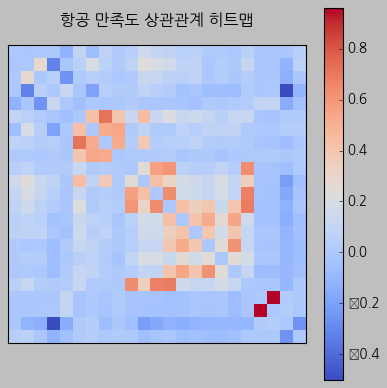

In [538]:
plt.matshow(corr_X,cmap='coolwarm')
plt.colorbar()
plt.title("항공 만족도 상관관계 히트맵")
plt.xticks([])
plt.yticks([])

In [539]:
corr_X_stack=corr_X.stack()
corr_X_stack[corr_X_stack>0.6]

Seat comfort                Food and drink                0.719802
Food and drink              Seat comfort                  0.719802
Inflight wifi service       Ease of Online booking        0.606855
                            Online boarding               0.638152
Online support              Ease of Online booking        0.635854
                            Online boarding               0.679442
Ease of Online booking      Inflight wifi service         0.606855
                            Online support                0.635854
                            Online boarding               0.692356
Baggage handling            Cleanliness                   0.623317
Cleanliness                 Baggage handling              0.623317
Online boarding             Inflight wifi service         0.638152
                            Online support                0.679442
                            Ease of Online booking        0.692356
Departure Delay in Minutes  Arrival Delay in Minutes      0.96

## 상관관계가 높은쌍이 많다.

공분산 검사를 통해 변수제거

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifdata=X.copy()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vif["features"] = vifdata.columns
vif

,VIF Factor,features
0,2.136663,Gender
1,7.139145,Customer Type
2,6.262177,Age
3,4.464305,Type of Travel
4,4.712663,Flight Distance
5,13.124873,Seat comfort
6,8.957879,Departure/Arrival time convenient
7,13.815501,Food and drink
8,5.751200,Gate location
9,13.314338,Inflight wifi service


### 제거법 vif 상관계수를 확인 제일 높은값 제거=> 다시 변수별 vif 구해서 제일 높은값 제거 (10이상인것이 없을때 까지)

In [541]:
delcolumns={}
while True:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
    vif["features"] = vifdata.columns
    if vif.max()[0]>10:
        vifdata=vifdata.drop(vif[vif['VIF Factor']==vif['VIF Factor'].max()].features,1)
        delcolumns[vif[vif['VIF Factor']==vif['VIF Factor'].max()].features.values[0]]=vif[vif['VIF Factor']==vif['VIF Factor'].max()]['VIF Factor'].values[0]
    else:
        break

In [542]:
delcolumns

{'Ease of Online booking': 16.46648359885526,
 'Arrival Delay in Minutes': 15.497269810063267,
 'Inflight entertainment': 13.8091447247996,
 'Food and drink': 12.868297117235837,
 'Inflight wifi service': 12.240731028401376,
 'Cleanliness': 12.199287107098018,
 'Leg room service': 10.25044821591339}

In [543]:
vif

,VIF Factor,features
0,2.084419,Gender
1,6.522945,Customer Type
2,6.129958,Age
3,4.119284,Type of Travel
4,4.535324,Flight Distance
5,7.173796,Seat comfort
6,8.183512,Departure/Arrival time convenient
7,5.155573,Gate location
8,9.349988,Online support
9,7.033486,On-board service


In [544]:
### 남은 변수들로 aic 기법을 써준다

Text(0.5, 1.0, 'Information-criterion for model selection')

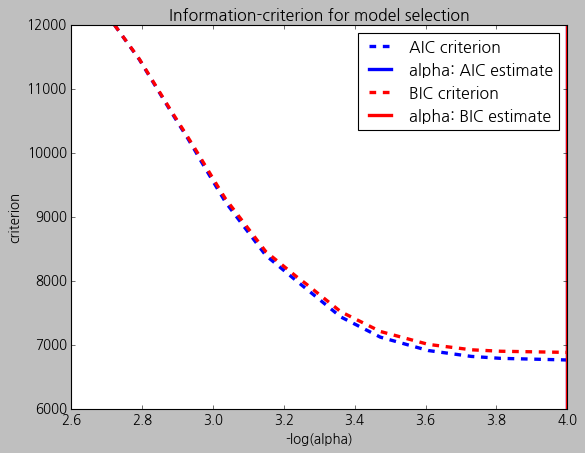

In [545]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

EPSILON = 1e-4

X = pd.DataFrame(vifdata.copy(),columns=vifdata.columns)

y = y

rng = np.random.RandomState(42)

stscaler=StandardScaler() #### 정규화를 통해 회귀계수를 통해 정규화를
stscaler.fit(X)
X=stscaler.transform(X)

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

In [546]:
aic_var=vifdata.columns[model_aic.coef_!=0]

In [547]:
print(pd.Series(dict(zip(vifdata.columns,abs(model_aic.coef_)))).sort_values(ascending=False)) 

Customer Type                        0.147491
Seat comfort                         0.124562
Departure/Arrival time convenient    0.081363
On-board service                     0.078037
Gender                               0.076553
Online support                       0.065166
Checkin service                      0.061111
Type of Travel                       0.060844
Class_Eco                            0.059732
Online boarding                      0.056422
Baggage handling                     0.043231
Class_Eco_plus                       0.038367
Departure Delay in Minutes           0.021530
Flight Distance                      0.020235
Age                                  0.012840
Gate location                        0.009915
dtype: float64


#### aic도 bic 도 변수선택 과정에서 변수를 제거하지 않는다

# 예측 모델 만들기 시작

### 예측모형을 위한 패키지들 imort

In [548]:
from sklearn.model_selection import train_test_split 
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### 사용할 변수들

In [549]:
variable=aic_var
print("사용할 변수들")
print(variable)
print("사용할 변수개수:",len(variable))

사용할 변수들
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Gate location',
       'Online support', 'On-board service', 'Baggage handling',
       'Checkin service', 'Online boarding', 'Departure Delay in Minutes',
       'Class_Eco', 'Class_Eco_plus'],
      dtype='object')
사용할 변수개수: 16


#### Train Set: VAlidation set: Test set 비율이 0.7: 0,15:0.15 가 되도록 데이터를 나눠준다

In [550]:
X=pd.DataFrame(X,columns=aic_var)

In [551]:
print('X and y Input Data:   ', X.shape, y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0) ###train set 비율이 0.7 test set 비율이 0.3

print('Training Set Shape:   ', X_train.shape, y_train.shape)
X_val,X_test,y_val,y_test=train_test_split(X_val, y_val, test_size=0.5, random_state=0) ###다시 테스트,validation 비율을 1대1
print('Validation Set Shape: ', X_val.shape,y_val.shape)
print("Test Set shape:",X_test.shape,y_test.shape)

X and y Input Data:    (11997, 16) (11997,)
Training Set Shape:    (8397, 16) (8397,)
Validation Set Shape:  (1800, 16) (1800,)
Test Set shape: (1800, 16) (1800,)


In [552]:
print("training set 반응변수 비율 0:", sum(y_train==0),"  1:",sum(y_train==1))
print("Validation set 반응변수 비율 0:", sum(y_val==0),"  1:",sum(y_val==1))
print("Test set 반응변수 비율 0:", sum(y_test==0),"  1:",sum(y_test==1))

training set 반응변수 비율 0: 3811   1: 4586
Validation set 반응변수 비율 0: 826   1: 974
Test set 반응변수 비율 0: 836   1: 964


### 이익도표를 만들기 위한 함수를 만들어준다

In [553]:
def calc_lift(x,y,clf,bins=10): 
     #Actual Value of y
    y_actual = np.hstack(y)
    #Predicted Probability that y = 1 
    y_prob = clf.predict_proba(x) 
    #Predicted Value of Y 
    y_pred = clf.predict(x) 
    cols = ['ACTUAL','PROB_POSITIVE','PREDICTED'] 
    data = [y_actual,y_prob[:,1],y_pred] 
    df = pd.DataFrame(dict(zip(cols,data))) 
    #Observations where y=1 
    total_positive_n = df['ACTUAL'].sum() 
    #Total Observations 
    total_n = df.index.size 
    natural_positive_prob = total_positive_n/float(total_n) 
    df['상위구간'] = pd.qcut(df['PROB_POSITIVE'],bins,labels=False, duplicates='drop') 
    pos_group_df = df.groupby('상위구간')
    #Percentage of Observations in each Bin where y = 1  
    actual=pos_group_df['ACTUAL'].sum().sort_index(ascending=False)
    bin_count=pos_group_df['ACTUAL'].count().sort_index(ascending=False)
    cumsum=np.cumsum(bin_count)
    cumsum_percentage=np.cumsum(bin_count)/np.sum(bin_count)
    lift_positive = pos_group_df['ACTUAL'].sum().sort_index(ascending=False)/pos_group_df['ACTUAL'].count().sort_index(ascending=False)
    cum_active=np.cumsum(pos_group_df['ACTUAL'].sum().sort_index(ascending=False))/np.cumsum(pos_group_df['ACTUAL'].count().sort_index(ascending=False))
    cum_lift_positive=np.cumsum(pos_group_df['ACTUAL'].sum().sort_index(ascending=False))/np.cumsum(pos_group_df['ACTUAL'].count().sort_index(ascending=False))
    cum_lift_positive=cum_lift_positive/natural_positive_prob 
    lift_index_positive = (lift_positive/natural_positive_prob)
    
    #Consolidate Results into Output Dataframe 
    lift_df = pd.DataFrame({ '구간 관측치 개수':bin_count
                                ,'구간 활성화 비율(%)':lift_positive*100 , 
                                   '구간 LIFT':lift_index_positive, 
                                 '구간 실제 만족한 사람 수':actual,
                                 '누적 관측치 개수':np.round(cumsum,1),
                                '누적 활성화 비율 %':np.round(cum_active,2),
                            '누적 실제 만족한 사람수':np.cumsum(actual),
                            '누적 lift (%)':cum_lift_positive}) 
    lift_df.index=[1,2,3,4,5,6,7,8,9,10]
    lift_df.index.name='구간'
    return lift_df 


## Logistic Regression 모델 적합

In [554]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class LogisticReg: 
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

a=LogisticReg()
a.fit(X_train,y_train)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [555]:
clf_Log = LogisticRegression()
clf_Log=clf_Log.fit(X_train, y_train)
y_test_score = clf_Log.decision_function(X_test)
y_score = clf_Log.decision_function(X_val)
y_pred_Log = clf_Log.predict(X_val)
pd.DataFrame({'Columns':X_train.columns,'Coefficients':np.hstack(clf_Log.coef_),"p_Value":np.round(a.p_values,3)})

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Columns,Coefficients,p_Value
0,Gender,0.552474,0.000
1,Customer Type,0.922497,0.000
2,Age,-0.033884,0.298
3,Type of Travel,0.439030,0.000
4,Flight Distance,-0.113213,0.001
5,Seat comfort,0.793209,0.000
6,Departure/Arrival time convenient,-0.510503,0.000
7,Gate location,-0.032541,0.362
8,Online support,0.416263,0.000
9,On-board service,0.539116,0.000


#### 잔차플롯

In [556]:
residual=y_test-y_test_score

Text(0, 0.5, '잔차값')

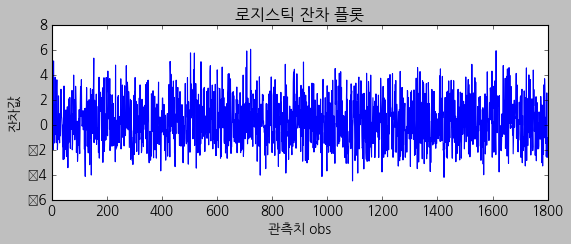

In [557]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(len(residual)),residual)
plt.title("로지스틱 잔차 플롯")
plt.xlabel("관측치 obs")
plt.ylabel("잔차값")

Text(0, 0.5, '빈도값')

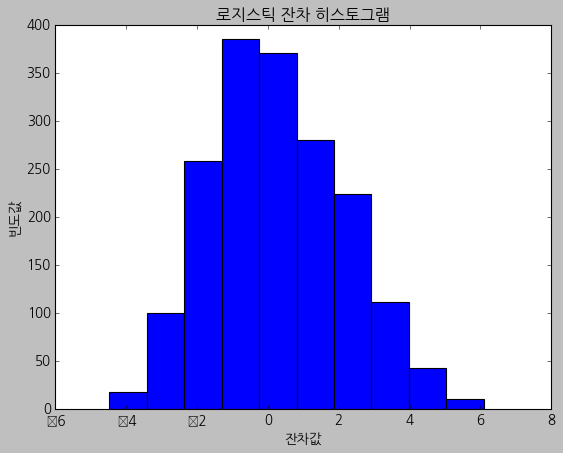

In [558]:
plt.hist(residual)
plt.title("로지스틱 잔차 히스토그램")###정규분포를 따르는것처럼 보인다 
plt.xlabel("잔차값")
plt.ylabel("빈도값")

Text(0, 0.5, 'TRUE 양성 비율')

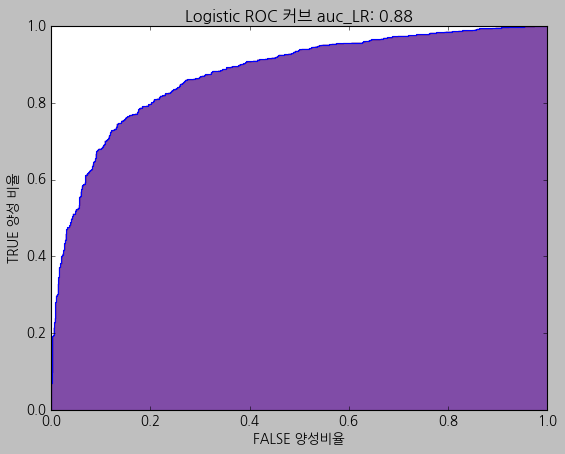

In [559]:
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_LR=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("Logistic ROC 커브 auc_LR: %s" %auc_LR)
plt.xlabel("FALSE 양성비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

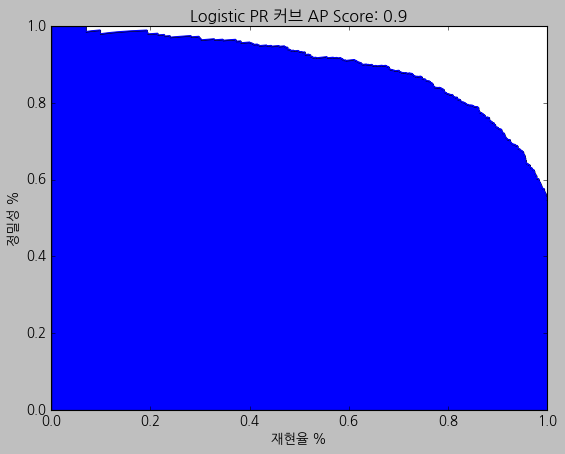

In [560]:
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_Log=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("Logistic PR 커브 AP Score: %s"%ap_score_Log)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [561]:
calc_lift(X_train,y_train,clf_Log,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,840,97.976190,1.793951,823,840,0.98,823,1.793951
2,840,95.000000,1.739457,798,1680,0.96,1621,1.766704
3,839,92.133492,1.686971,773,2519,0.95,2394,1.740148
4,840,84.523810,1.547637,710,3359,0.92,3104,1.692006
5,839,64.600715,1.182844,542,4198,0.87,3646,1.590246
6,840,42.142857,0.771639,354,5038,0.79,4000,1.453757
7,840,31.785714,0.581999,267,5878,0.73,4267,1.329178
8,839,18.831943,0.344814,158,6717,0.66,4425,1.206224
9,840,11.785714,0.215797,99,7557,0.60,4524,1.096133


In [562]:
calc_lift(X_val,y_val,clf_Log,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,98.888889,1.827515,178,180,0.99,178,1.827515
2,180,93.888889,1.735113,169,360,0.96,347,1.781314
3,180,85.000000,1.570842,153,540,0.93,500,1.711157
4,180,81.111111,1.498973,146,720,0.90,646,1.658111
5,180,61.111111,1.129363,110,900,0.84,756,1.552361
6,180,47.222222,0.872690,85,1080,0.78,841,1.439083
7,180,28.888889,0.533881,52,1260,0.71,893,1.309768
8,180,21.666667,0.400411,39,1440,0.65,932,1.196099
9,180,15.555556,0.287474,28,1620,0.59,960,1.095140


### decision tree classifer

In [563]:
###의사결정나무
from sklearn.tree import DecisionTreeClassifier


clf_DT = DecisionTreeClassifier()
parameters={'max_depth':[3,5,7]}
clf_DT=GridSearchCV(clf_DT,parameters,cv=5)
clf_DT.fit(X_train,y_train)
print(clf_DT.best_params_)
clf_DT=clf_DT.best_estimator_


y_pred_DT = clf_DT.predict(X_val)

{'max_depth': 7}


### max deplth=7 일때가 낫다고 한다

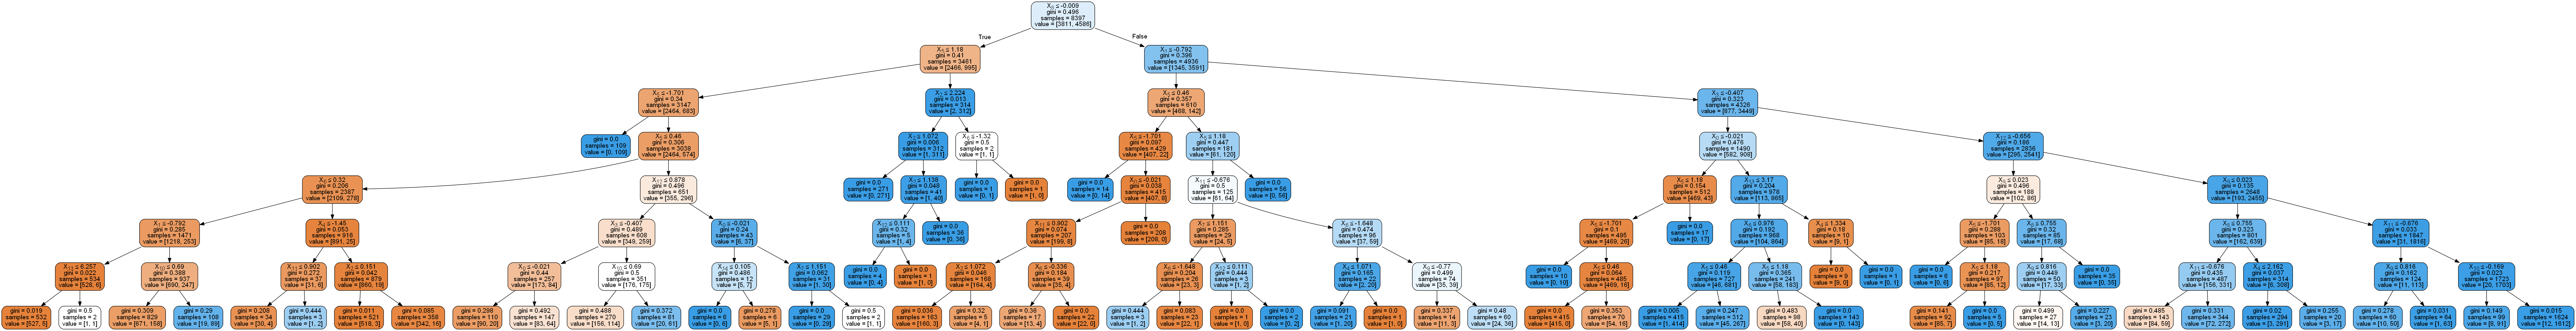

In [564]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Text(0, 0.5, 'TRUE 양성 비율')

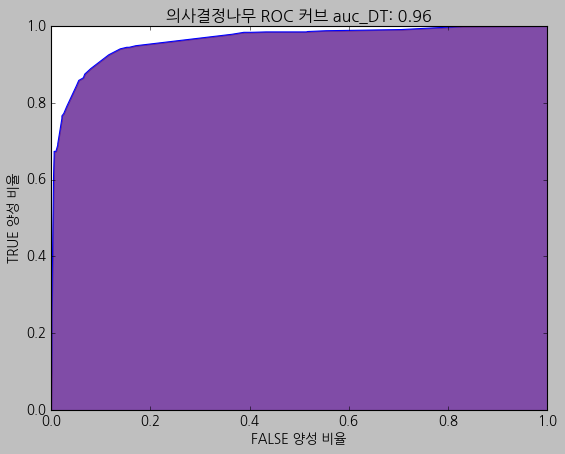

In [565]:
y_score = clf_DT.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
auc_DT=np.round(roc_auc_score(y_val,y_score),2)
fpr, tpr, thresholds = roc_curve(y_val,y_score)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("의사결정나무 ROC 커브 auc_DT: %s"%auc_DT)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

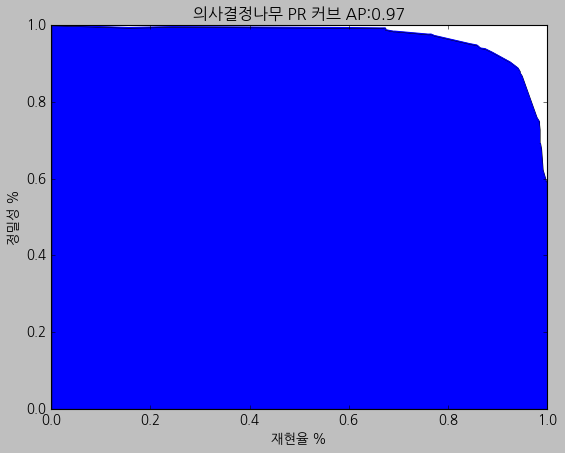

In [566]:
y_score = clf_DT.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_DT=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("의사결정나무 PR 커브 AP:%s"%ap_score_DT)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

## KNN 모델 적합

In [567]:
clf_KNN=KNeighborsClassifier()
parameters={'n_neighbors':[5],'weights':['uniform','distance']}
clf_KNN=GridSearchCV(clf_KNN,parameters,cv=5)
clf_KNN.fit(X_train,y_train)
print(clf_KNN.best_params_)
clf_KNN=clf_KNN.best_estimator_


y_pred_KNN = clf_KNN.predict(X_val)


{'n_neighbors': 5, 'weights': 'uniform'}


### uniform 이 낫다고 한다

Text(0, 0.5, 'TRUE 양성 비율')

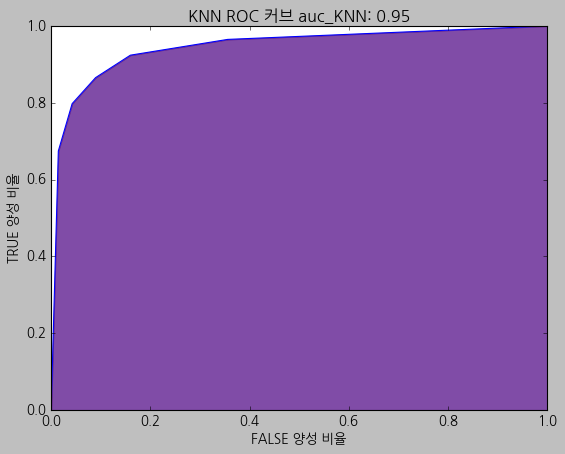

In [568]:
y_score = clf_KNN.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
auc_KNN=np.round(roc_auc_score(y_val,y_score),2)
fpr, tpr, thresholds = roc_curve(y_val,y_score)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("KNN ROC 커브 auc_KNN: %s"%auc_KNN)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

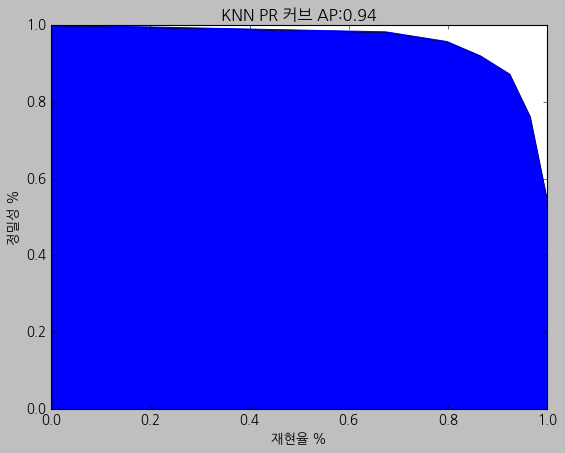

In [569]:
y_score = clf_KNN.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_KNN=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("KNN PR 커브 AP:%s"%ap_score_KNN)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

### NAIVE BAYES CLASSIFIER 분류기

In [570]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

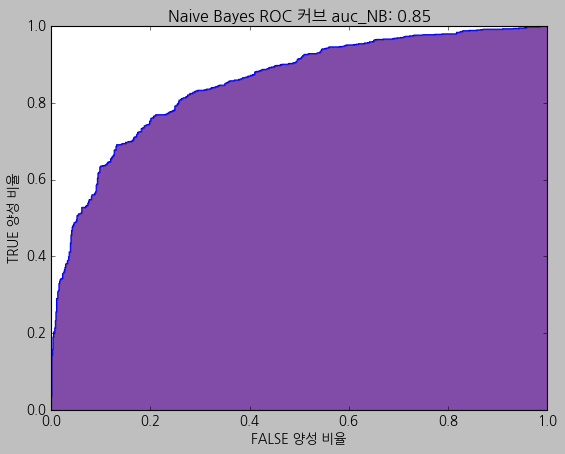

In [571]:
y_score = clf_NB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
auc_NB=np.round(roc_auc_score(y_val,y_score),2)
fpr, tpr, thresholds = roc_curve(y_val,y_score)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("Naive Bayes ROC 커브 auc_NB: %s"%auc_NB)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

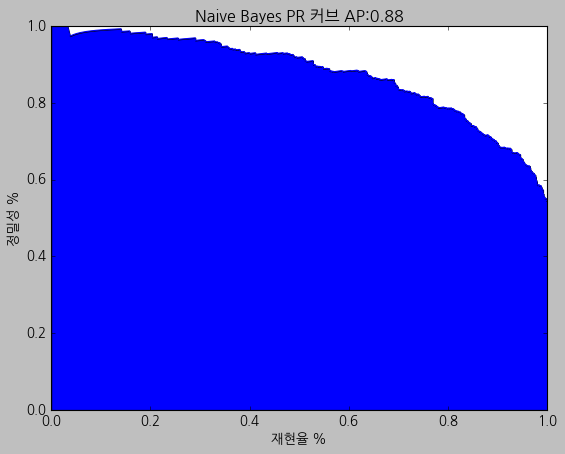

In [572]:
y_score = clf_NB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_NB=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("Naive Bayes PR 커브 AP:%s"%ap_score_NB)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [573]:
calc_lift(X_train,y_train,clf_NB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,828,98.309179,1.800048,814,828,0.98,814,1.800048
2,852,93.309859,1.708510,795,1680,0.96,1609,1.753626
3,838,89.021480,1.629990,746,2518,0.94,2355,1.712479
4,841,73.127229,1.338965,615,3359,0.88,2970,1.618962
5,839,61.978546,1.134832,520,4198,0.83,3490,1.522205
6,840,48.690476,0.891526,409,5038,0.77,3899,1.417050
7,839,30.274136,0.554322,254,5877,0.71,4153,1.293887
8,839,23.361144,0.427744,196,6716,0.65,4349,1.185684
9,841,17.954816,0.328754,151,7557,0.60,4500,1.090318


In [574]:
calc_lift(X_val,y_val,clf_NB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,98.333333,1.817248,177,180,0.98,177,1.817248
2,180,91.111111,1.683778,164,360,0.95,341,1.750513
3,180,85.555556,1.581109,154,540,0.92,495,1.694045
4,180,72.777778,1.344969,131,720,0.87,626,1.606776
5,180,60.000000,1.108830,108,900,0.82,734,1.507187
6,179,44.692737,0.825944,80,1079,0.75,814,1.394172
7,181,34.254144,0.633033,62,1260,0.70,876,1.284834
8,180,28.888889,0.533881,52,1440,0.64,928,1.190965
9,179,14.525140,0.268432,26,1619,0.59,954,1.088968


## 신경망 모델 적합

In [605]:
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128))
clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'TRUE 양성 비율')

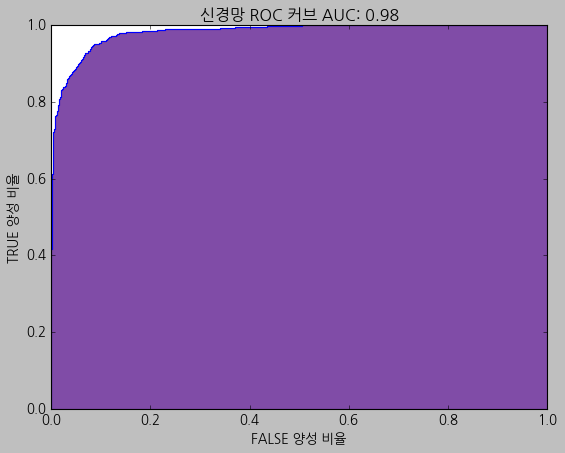

In [615]:
y_score = clf_MLP.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_MLP=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("신경망 ROC 커브 AUC: %s"%auc_MLP)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

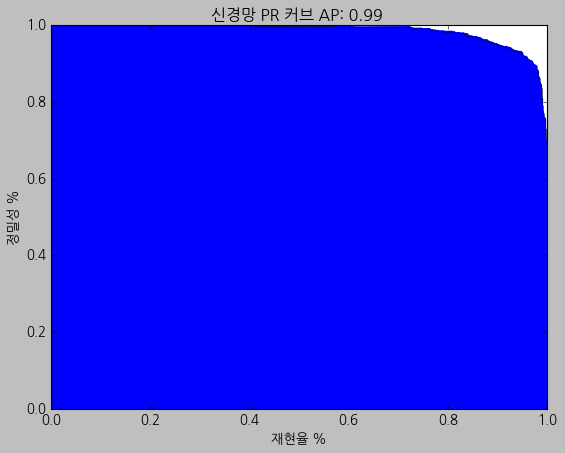

In [616]:
y_score = clf_MLP.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_MLP=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("신경망 PR 커브 AP: %s "%ap_score_MLP)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [617]:
calc_lift(X_train,y_train,clf_MLP)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,840,100.000000,1.831007,840,840,1.00,840,1.831007
2,840,100.000000,1.831007,840,1680,1.00,1680,1.831007
3,839,100.000000,1.831007,839,2519,1.00,2519,1.831007
4,840,99.642857,1.824468,837,3359,1.00,3356,1.829372
5,839,98.092968,1.796090,823,4198,1.00,4179,1.822720
6,840,44.642857,0.817414,375,5038,0.90,4554,1.655103
7,840,3.452381,0.063213,29,5878,0.78,4583,1.427613
8,839,0.238379,0.004365,2,6717,0.68,4585,1.249839
9,840,0.119048,0.002180,1,7557,0.61,4586,1.111155


In [618]:
calc_lift(X_val,y_val,clf_MLP)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,100.000000,1.848049,180,180,1.00,180,1.848049
2,180,100.000000,1.848049,180,360,1.00,360,1.848049
3,180,99.444444,1.837782,179,540,1.00,539,1.844627
4,180,97.222222,1.796715,175,720,0.99,714,1.832649
5,180,81.666667,1.509240,147,900,0.96,861,1.767967
6,180,52.222222,0.965092,94,1080,0.88,955,1.634155
7,180,6.666667,0.123203,12,1260,0.77,967,1.418304
8,180,3.333333,0.061602,6,1440,0.68,973,1.248717
9,180,0.555556,0.010267,1,1620,0.60,974,1.111111


## 랜덤포레스트

In [580]:
clf_RF = RandomForestClassifier(n_estimators=50, criterion='gini')
parameters={'max_depth':[3,5,7]}
clf_RF=GridSearchCV(clf_RF,parameters,cv=5)
clf_RF.fit(X_train,y_train)
print(clf_RF.best_params_)
clf_RF=clf_RF.best_estimator_
y_pred_RF = clf_RF.predict(X_val)

{'max_depth': 7}


### max_depth=7일때가 좋다고 한다.

Text(0, 0.5, 'TRUE 양성 비율')

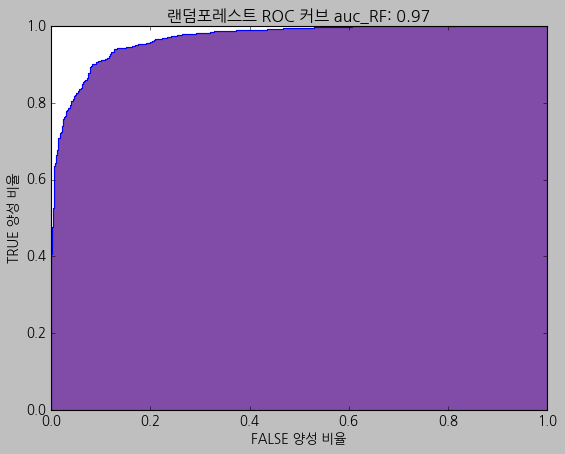

In [581]:
y_score = clf_RF.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_RF=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("랜덤포레스트 ROC 커브 auc_RF: %s"%auc_RF)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

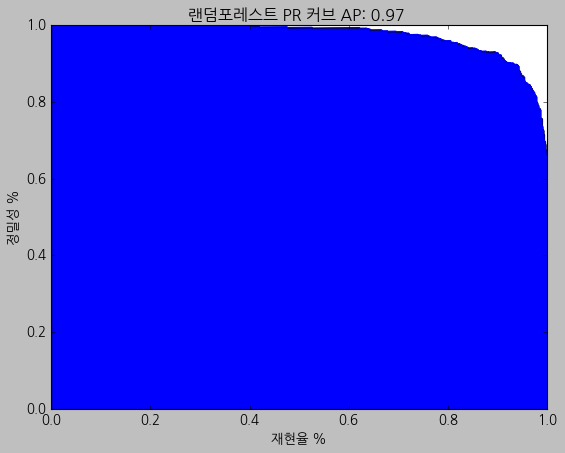

In [582]:
y_score = clf_RF.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_RF=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("랜덤포레스트 PR 커브 AP: %s "%ap_score_RF)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [583]:
calc_lift(X_train,y_train,clf_RF)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,839,100.000000,1.831007,839,839,1.00,839,1.831007
2,841,100.000000,1.831007,841,1680,1.00,1680,1.831007
3,839,99.165673,1.815731,832,2519,1.00,2512,1.825919
4,840,95.833333,1.754715,805,3359,0.99,3317,1.808113
5,839,83.432658,1.527658,700,4198,0.96,4017,1.752062
6,840,48.809524,0.893706,410,5038,0.88,4427,1.608946
7,840,12.738095,0.233235,107,5878,0.77,4534,1.412349
8,839,3.814064,0.069836,32,6717,0.68,4566,1.244660
9,840,1.785714,0.032697,15,7557,0.61,4581,1.109944


In [584]:
calc_lift(X_val,y_val,clf_RF)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,100.000000,1.848049,180,180,1.00,180,1.848049
2,179,100.000000,1.848049,179,359,1.00,359,1.848049
3,181,97.790055,1.807208,177,540,0.99,536,1.834360
4,180,92.777778,1.714579,167,720,0.98,703,1.804415
5,180,76.111111,1.406571,137,900,0.93,840,1.724846
6,180,49.444444,0.913758,89,1080,0.86,929,1.589665
7,180,17.777778,0.328542,32,1260,0.76,961,1.409504
8,180,6.111111,0.112936,11,1440,0.68,972,1.247433
9,180,0.555556,0.010267,1,1620,0.60,973,1.109970


## 아다부스트

In [585]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

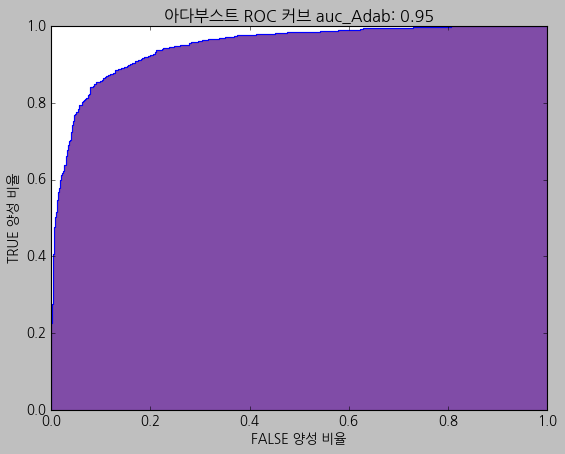

In [586]:
y_score = clf_AdaB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_Adab=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("아다부스트 ROC 커브 auc_Adab: %s"%auc_Adab)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

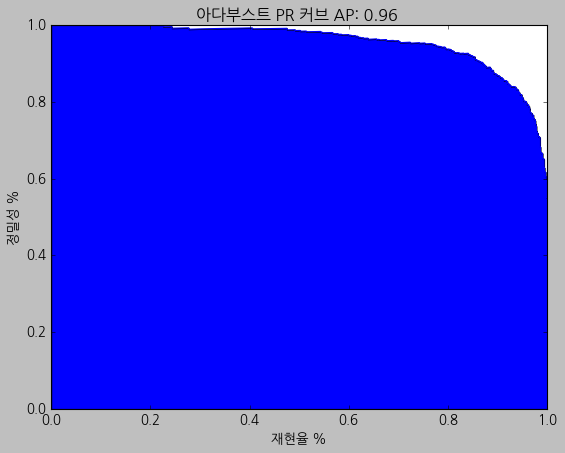

In [587]:
y_score = clf_AdaB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_ADA=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("아다부스트 PR 커브 AP: %s "%ap_score_ADA)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [588]:
calc_lift(X_train,y_train,clf_AdaB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,840,99.404762,1.820109,835,840,0.99,835,1.820109
2,840,98.571429,1.804850,828,1680,0.99,1663,1.812479
3,839,96.901073,1.774266,813,2519,0.98,2476,1.799752
4,840,92.261905,1.689322,775,3359,0.97,3251,1.772136
5,839,77.711561,1.422904,652,4198,0.93,3903,1.702340
6,840,45.000000,0.823953,378,5038,0.85,4281,1.555884
7,840,20.595238,0.377100,173,5878,0.76,4454,1.387429
8,839,10.607867,0.194231,89,6717,0.68,4543,1.238390
9,840,4.047619,0.074112,34,7557,0.61,4577,1.108975


In [589]:
calc_lift(X_val,y_val,clf_AdaB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,100.000000,1.848049,180,180,1.00,180,1.848049
2,180,98.333333,1.817248,177,360,0.99,357,1.832649
3,180,96.111111,1.776181,173,540,0.98,530,1.813826
4,180,87.222222,1.611910,157,720,0.95,687,1.763347
5,180,77.777778,1.437372,140,900,0.92,827,1.698152
6,180,44.444444,0.821355,80,1080,0.84,907,1.552019
7,180,23.888889,0.441478,43,1260,0.75,950,1.393370
8,180,6.666667,0.123203,12,1440,0.67,962,1.234600
9,180,5.555556,0.102669,10,1620,0.60,972,1.108830


## 그래디언트 부스트

In [590]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

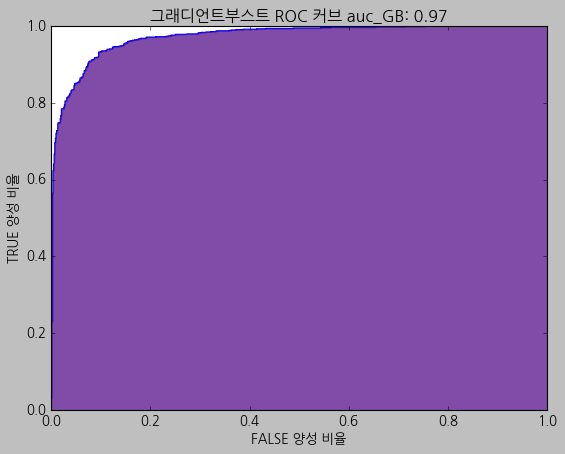

In [591]:
y_score = clf_GB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_GB=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("그래디언트부스트 ROC 커브 auc_GB: %s"%auc_GB)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

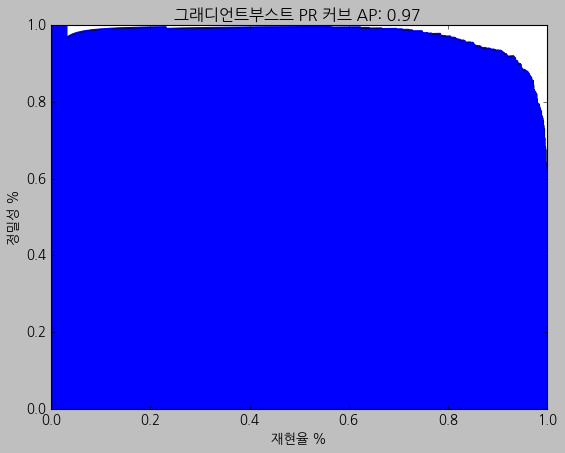

In [592]:
y_score = clf_GB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_GB=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("그래디언트부스트 PR 커브 AP: %s "%ap_score_GB)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [593]:
calc_lift(X_train,y_train,clf_GB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,787,99.364676,1.819375,782,787,0.99,782,1.819375
2,893,99.776036,1.826907,891,1680,1.00,1673,1.823378
3,838,99.880668,1.828822,837,2518,1.00,2510,1.825190
4,841,97.265161,1.780932,818,3359,0.99,3328,1.814109
5,833,82.232893,1.505690,685,4192,0.96,4013,1.752823
6,846,48.345154,0.885203,409,5038,0.88,4422,1.607129
7,839,12.038141,0.220419,101,5877,0.77,4523,1.409162
8,834,5.755396,0.105382,48,6711,0.68,4571,1.247137
9,844,1.658768,0.030372,14,7555,0.61,4585,1.111207


In [594]:
calc_lift(X_val,y_val,clf_GB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,163,99.386503,1.836712,162,163,0.99,162,1.836712
2,197,99.492386,1.838668,196,360,0.99,358,1.837782
3,180,100.000000,1.848049,180,540,1.00,538,1.841205
4,180,95.000000,1.755647,171,720,0.98,709,1.819815
5,178,76.404494,1.411993,136,898,0.94,845,1.738977
6,182,51.648352,0.954487,94,1080,0.87,939,1.606776
7,179,13.407821,0.247783,24,1259,0.76,963,1.413560
8,181,4.419890,0.081682,8,1440,0.67,971,1.246150
9,180,1.666667,0.030801,3,1620,0.60,974,1.111111


### SVM (서포트 벡터 머신)

In [595]:
clf_SVM = SVC(probability=True)
parameters={'C': [1, 10, 100]}
clf_SVM=GridSearchCV(clf_SVM,parameters,cv=5)
clf_SVM.fit(X_train,y_train)
print(clf_SVM.best_params_)
clf_SVM=clf_SVM.best_estimator_
y_pred_SVM = clf_SVM.predict(X_val)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

{'C': 10}


#### c=10일때가 제일 좋다고 한다

Text(0, 0.5, 'TRUE 양성 비율')

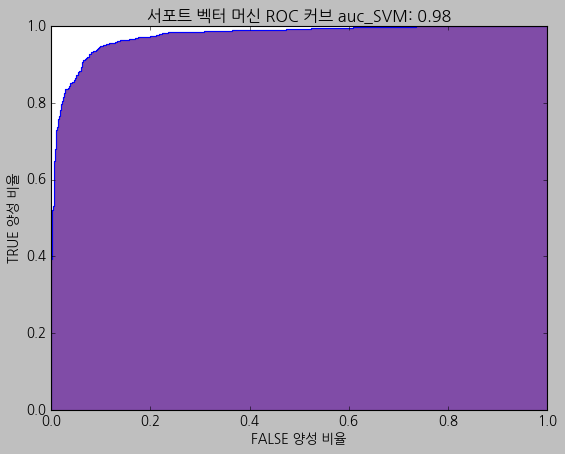

In [596]:
y_score = clf_SVM.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc_SVM=np.round(roc_auc_score(y_val,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("서포트 벡터 머신 ROC 커브 auc_SVM: %s"%auc_SVM)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

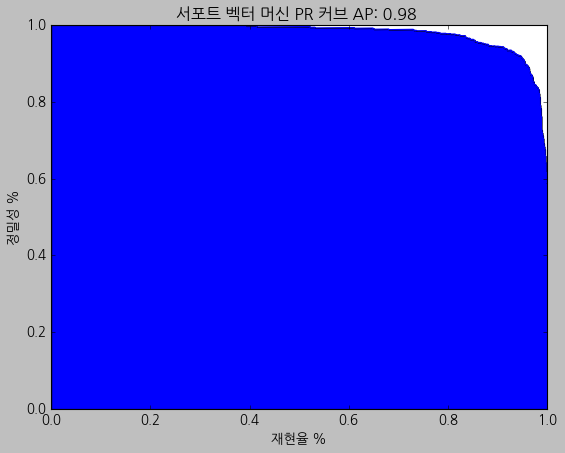

In [597]:
y_score = clf_SVM.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score)
ap_score_SVM=np.round(average_precision_score(y_val, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("서포트 벡터 머신 PR 커브 AP: %s "%ap_score_SVM)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [598]:
calc_lift(X_train,y_train,clf_SVM)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,840,100.000000,1.831007,840,840,1.00,840,1.831007
2,840,99.880952,1.828828,839,1680,1.00,1679,1.829918
3,839,100.000000,1.831007,839,2519,1.00,2518,1.830281
4,840,98.928571,1.811389,831,3359,1.00,3349,1.825556
5,839,98.808105,1.809184,829,4198,1.00,4178,1.822284
6,840,45.000000,0.823953,378,5038,0.90,4556,1.655830
7,840,0.952381,0.017438,8,5878,0.78,4564,1.421694
8,839,2.383790,0.043647,20,6717,0.68,4584,1.249566
9,840,0.238095,0.004360,2,7557,0.61,4586,1.111155


In [599]:
calc_lift(X_val,y_val,clf_SVM)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,100.000000,1.848049,180,180,1.00,180,1.848049
2,180,100.000000,1.848049,180,360,1.00,360,1.848049
3,180,97.777778,1.806982,176,540,0.99,536,1.834360
4,180,97.222222,1.796715,175,720,0.99,711,1.824949
5,180,80.000000,1.478439,144,900,0.95,855,1.755647
6,180,47.777778,0.882957,86,1080,0.87,941,1.610198
7,180,11.666667,0.215606,21,1260,0.76,962,1.410971
8,180,4.444444,0.082136,8,1440,0.67,970,1.244867
9,180,1.666667,0.030801,3,1620,0.60,973,1.109970


#### 모형평가

In [611]:
print('    모델들의 정확도                    ')
print('--------------------------------')
print('Naive Bayes의                     Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_NB),2) )
print('Neural Network의                  Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_MLP),2) )
print('Logistic Regression의             Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_Log),2) )
print('Random Forest의                   Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_RF),2) )
print('AdaBoost의                        Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_AdaB),2))
print('GradientBoost의                   Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_GB),2) )               
print('Support Vector Machine의          Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_SVM),2) )
print('KNN의                             Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_KNN),2 ) )              
print('Decision Tree의                   Accuracy: %s '%np.round(accuracy_score(y_val,y_pred_DT),2) )

    모델들의 정확도                    
--------------------------------
Naive Bayes의                     Accuracy: 0.77 
Neural Network의                  Accuracy: 0.93 
Logistic Regression의             Accuracy: 0.8 
Random Forest의                   Accuracy: 0.91 
AdaBoost의                        Accuracy: 0.88 
GradientBoost의                   Accuracy: 0.92 
Support Vector Machine의          Accuracy: 0.92 
KNN의                             Accuracy: 0.89 
Decision Tree의                   Accuracy: 0.9 


In [612]:
print('    모델들의 Confusion_matrix                    ')
print('--------------------------------')
print('Naive Bayes의        \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_NB) )
print('Neural Network의    \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_MLP) )
print('Logistic Regression의 \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_Log) )
print('Random Forest의     \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_RF) )
print('AdaBoost의          \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_AdaB))
print('GradientBoost의     \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_GB) )               
print('Support Vector Machine의 \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_SVM) )
print('KNN의     \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_KNN) )               
print('Decision Tree의 \n confusion_matrix:\n %s '%confusion_matrix(y_val,y_pred_DT) )


    모델들의 Confusion_matrix                    
--------------------------------
Naive Bayes의        
 confusion_matrix:
 [[632 194]
 [221 753]] 
Neural Network의    
 confusion_matrix:
 [[758  68]
 [ 54 920]] 
Logistic Regression의 
 confusion_matrix:
 [[628 198]
 [169 805]] 
Random Forest의     
 confusion_matrix:
 [[753  73]
 [ 96 878]] 
AdaBoost의          
 confusion_matrix:
 [[722 104]
 [120 854]] 
GradientBoost의     
 confusion_matrix:
 [[753  73]
 [ 80 894]] 
Support Vector Machine의 
 confusion_matrix:
 [[757  69]
 [ 66 908]] 
KNN의     
 confusion_matrix:
 [[752  74]
 [131 843]] 
Decision Tree의 
 confusion_matrix:
 [[773  53]
 [132 842]] 


In [613]:
print('    모델들의 AUC                    ')
print('--------------------------------')
print('Naive Bayes의                     AUC: %s '%auc_NB )
print('Neural Network의                  AUC: %s '%auc_MLP )
print('Logistic Regression의             AUC: %s '%auc_LR )
print('Random Forest의                   AUC: %s '%auc_RF )
print('AdaBoost의                        AUC: %s '%auc_Adab )
print('GradientBoost의                   AUC: %s '%auc_GB )               
print('Support Vector Machine의          AUC: %s '%auc_SVM )
print('KNN의                             AUC: %s '%auc_KNN )               
print('Decision Tree의                   AUC: %s '%auc_DT )


    모델들의 AUC                    
--------------------------------
Naive Bayes의                     AUC: 0.85 
Neural Network의                  AUC: 0.98 
Logistic Regression의             AUC: 0.88 
Random Forest의                   AUC: 0.97 
AdaBoost의                        AUC: 0.95 
GradientBoost의                   AUC: 0.97 
Support Vector Machine의          AUC: 0.98 
KNN의                             AUC: 0.95 
Decision Tree의                   AUC: 0.96 


In [614]:
print('     모델들의 Validation AP Score     ')
print('--------------------------------')
print('Naive Bayes의                     AP  Score: %s '%ap_score_NB )
print('Neural Network의                  AP  Score: %s '%ap_score_MLP )
print('Logistic Regression의             AP  Score: %s '%ap_score_Log )
print('Random Forest의                   AP  Score: %s '%ap_score_RF )
print('AdaBoost의                        AP  Score: %s '%ap_score_ADA )
print('GradientBoost의                   AP  Score: %s '%ap_score_GB )               
print('Support Vector Machine의          AP  Score: %s '%ap_score_SVM )
print('KNN의                             AP  Score: %s '%ap_score_KNN )               
print('Decision Tree의                   AP  Score: %s '%ap_score_DT )

     모델들의 Validation AP Score     
--------------------------------
Naive Bayes의                     AP  Score: 0.88 
Neural Network의                  AP  Score: 0.99 
Logistic Regression의             AP  Score: 0.9 
Random Forest의                   AP  Score: 0.97 
AdaBoost의                        AP  Score: 0.96 
GradientBoost의                   AP  Score: 0.97 
Support Vector Machine의          AP  Score: 0.98 
KNN의                             AP  Score: 0.94 
Decision Tree의                   AP  Score: 0.97 


### 최종 모형 선택: 신경망 모델

In [132]:
final_pred_MLP=clf_MLP.predict(X_test)
print("신경망 모형 test set 정확도:%s"%np.round(accuracy_score(y_test,final_pred_MLP),2))

신경망 모형 test set 정확도:0.93


In [87]:
print('Neural Network의    \n confusion_matrix:\n %s '%confusion_matrix(y_test,final_pred_MLP) )

Neural Network의    
 confusion_matrix:
 [[769  67]
 [ 56 908]] 


Text(0, 0.5, 'TRUE 양성 비율')

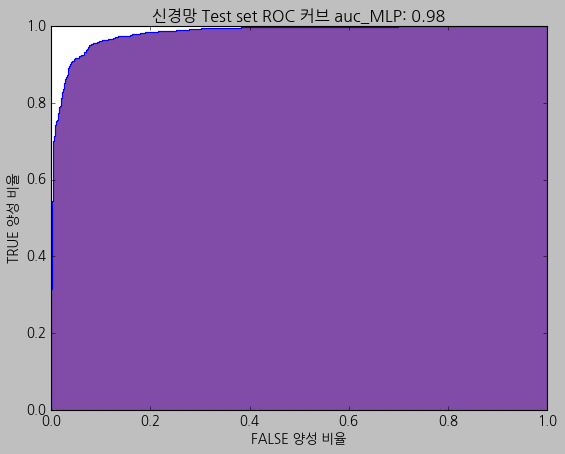

In [126]:
y_score = clf_MLP.predict_proba(X_test)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_test,y_score)
auc_MLP=np.round(roc_auc_score(y_test,y_score),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("신경망 Test set ROC 커브 auc_MLP: %s"%auc_MLP)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

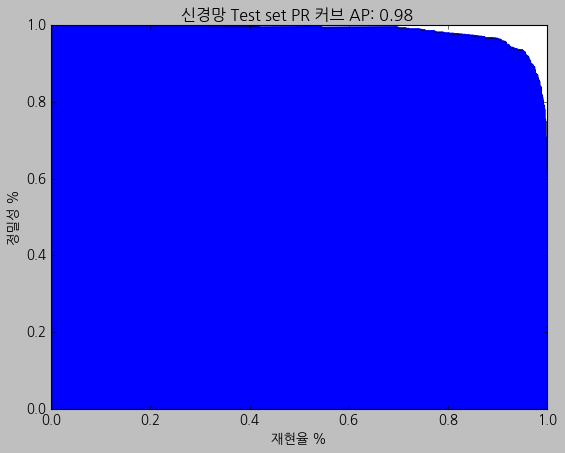

In [127]:
y_score = clf_MLP.predict_proba(X_test)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
ap_score_MLP=np.round(average_precision_score(y_test, y_score),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("신경망 Test set PR 커브 AP: %s "%ap_score_MLP)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [128]:
calc_lift(X_test,y_test,clf_MLP)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 만족한 사람 수,누적 관측치 개수,누적 활성화 비율 %,누적 실제 만족한 사람수,누적 lift (%)
구간,,,,,,,,
1,180,100.000000,1.867220,180,180,1.00,180,1.867220
2,180,99.444444,1.856846,179,360,1.00,359,1.862033
3,180,98.888889,1.846473,178,540,0.99,537,1.856846
4,180,97.777778,1.825726,176,720,0.99,713,1.849066
5,180,86.111111,1.607884,155,900,0.96,868,1.800830
6,180,41.666667,0.778008,75,1080,0.87,943,1.630360
7,180,8.888889,0.165975,16,1260,0.76,959,1.421162
8,180,1.666667,0.031120,3,1440,0.67,962,1.247407
9,180,0.555556,0.010373,1,1620,0.59,963,1.109959


In [131]:
variable_importances=list(zip(X_test.columns,np.round(clf_RF.feature_importances_,2)))
feature_importance_matrix=pd.DataFrame(variable_importances,columns=['Features','Importance']).sort_values(by='Importance')
print(feature_importance_matrix)

                             Features  Importance
15                     Class_Eco_plus        0.00
7                       Gate location        0.01
13         Departure Delay in Minutes        0.01
2                                 Age        0.02
4                     Flight Distance        0.02
11                    Checkin service        0.02
6   Departure/Arrival time convenient        0.04
10                   Baggage handling        0.04
3                      Type of Travel        0.05
14                          Class_Eco        0.05
0                              Gender        0.06
9                    On-board service        0.08
12                    Online boarding        0.08
1                       Customer Type        0.10
8                      Online support        0.19
5                        Seat comfort        0.23


### 가장 중요한 변수 5개: seat comfort,Online support ,Customer Type, online boarding, On-board service